# Online Shoppers' Purchasing Intention 

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 1. Business Problem 

Marketing, AI and analytics have combined to become a force that penetrates into cosumer patterns to detect their purchase intention. It has carved itself out as a business problem. Data and pain points tracked on websites and applications through various sources. They include: page views, duration of visit, clicks, bounce rates, conversion rates, etc. Knowing your potential shoppers' purchase intention beforehand allows the company to strategize and market effectively. And all the more working towards retaining their customers. 

## 2. About the dataset

The dataset comprises of analytic variables and attributes tracked from the Google Data Analytics (GDA) platform. It includes 12330 rows or sessions and has 18 columns of which 17 are the GDA features while 1 is the outcome variable. The outcome is Revenue and is labelled as FALSE or TRUE i.e. whether a particular session with those attributes would generate a purchase or not, therefore revenue or not. It contains no missing values. 

Before processing the dataset to check for the datatypes understood by Python, the following are their dataypes by virtue of the nature of the definition. 

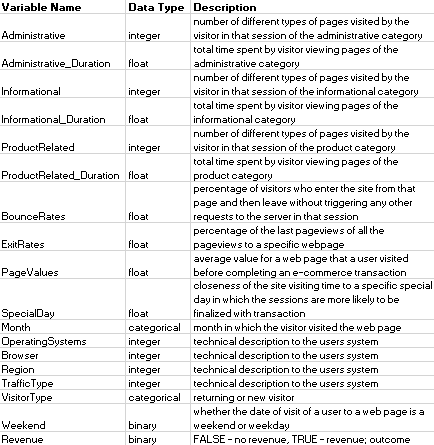

## 3.1. Importing the dataset

In [2]:
dataset_name = input('Name of the dataset: ')

Name of the dataset: online_shoppers_intent.csv


In [3]:
def read_csv(dataset_name):
    original_data = pd.read_csv(dataset_name, sep = ',', header = 0)
    return original_data

## 3.2. Dimensions of the dataset

In [4]:
def dimensions(dataset_name):
    dim = read_csv(dataset_name).shape
    return dim

In [5]:
dimensions(dataset_name)

(12330, 18)

## 4. Conversion of datatypes of variables

### 4.1. Original datatypes of the variables from Python

In [6]:
def data_types(dataset_name):
    return read_csv(dataset_name).dtypes

In [7]:
data_types(dataset_name)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

### 4.2. Conversion of datatypes through Label Encoding

In [8]:
def preprocess_data(dataset_name):
    data = read_csv(dataset_name)
    has_object = any(data.dtypes == 'object')
    has_bool = any(data.dtypes == 'bool')
    
    if has_object or has_bool:
        label_encoder = LabelEncoder()
        for col in data.columns:
            if data[col].dtype == 'object' or data[col].dtype == 'bool':
                data[col] = label_encoder.fit_transform(data[col])
        processed_data = data
    else:
        processed_data = data
    
    return processed_data


In [9]:
preprocess_data(dataset_name).dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int64
Revenue                      int64
dtype: object

In this case, initially detected object type variables, Month and VisitorType, were label encoded and converted to integer. While boolean variables like Weekend and our outcome variable Revenue were also label encoded and converted to integer. 

## 5. Missing Values Detection

In [10]:
def missing_vals(dataset_name):
    return preprocess_data(dataset_name).isna().sum()

In [11]:
missing_vals(dataset_name)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no missing values in this dataset.

## 6. Descriptive Summary Stats of Dataset

In [12]:
def descr(dataset_name):
    return preprocess_data(dataset_name).describe().applymap('{:.2f}'.format)

In [13]:
descr(dataset_name)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,5.16,2.12,2.36,3.15,4.07,1.72,0.23,0.15
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,2.37,0.91,1.72,2.40,4.03,0.69,0.42,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,5.00,2.00,2.00,1.00,2.00,2.00,0.00,0.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,6.00,2.00,2.00,3.00,2.00,2.00,0.00,0.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,7.00,3.00,2.00,4.00,4.00,2.00,0.00,0.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,9.00,8.00,13.00,9.00,20.00,2.00,1.00,1.00


### 6.1. Interpretation of Summary Stats

The variables which will be discussed here are: Administrative, Informational and ProductRelated and their respective durations, along with the bounce and exit rates, and page values. 

Of the 3 categories, larger average of the sessions viewed ProductRelated webpages by thirty fold than the other two. And the maximum of the average duration also went to ProductRelated. This implies that most people viewed ProductRelated webpages and for longer time periods. 

The average bounce and exit rates are also very low: 2% and 4%, respectively. While the maximum (20%) are just at the edge of the reasonable range. While the percentage for the Special Day is also low i.e. 6% chance to make a transaction given that it is close to a special day. 

## 7. Boxplots

In [14]:
def extract_numeric_cols(dataset_name):
    return preprocess_data(dataset_name).select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

In [15]:
extract_numeric_cols(dataset_name)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

### 7.1. Boxplots Generation

In [16]:
def boxplots(dataset_name):
    numeric_columns = extract_numeric_cols(dataset_name)
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(30, 16))

    for i, col in enumerate(numeric_columns):
        axs[i].boxplot(preprocess_data(dataset_name)[col])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

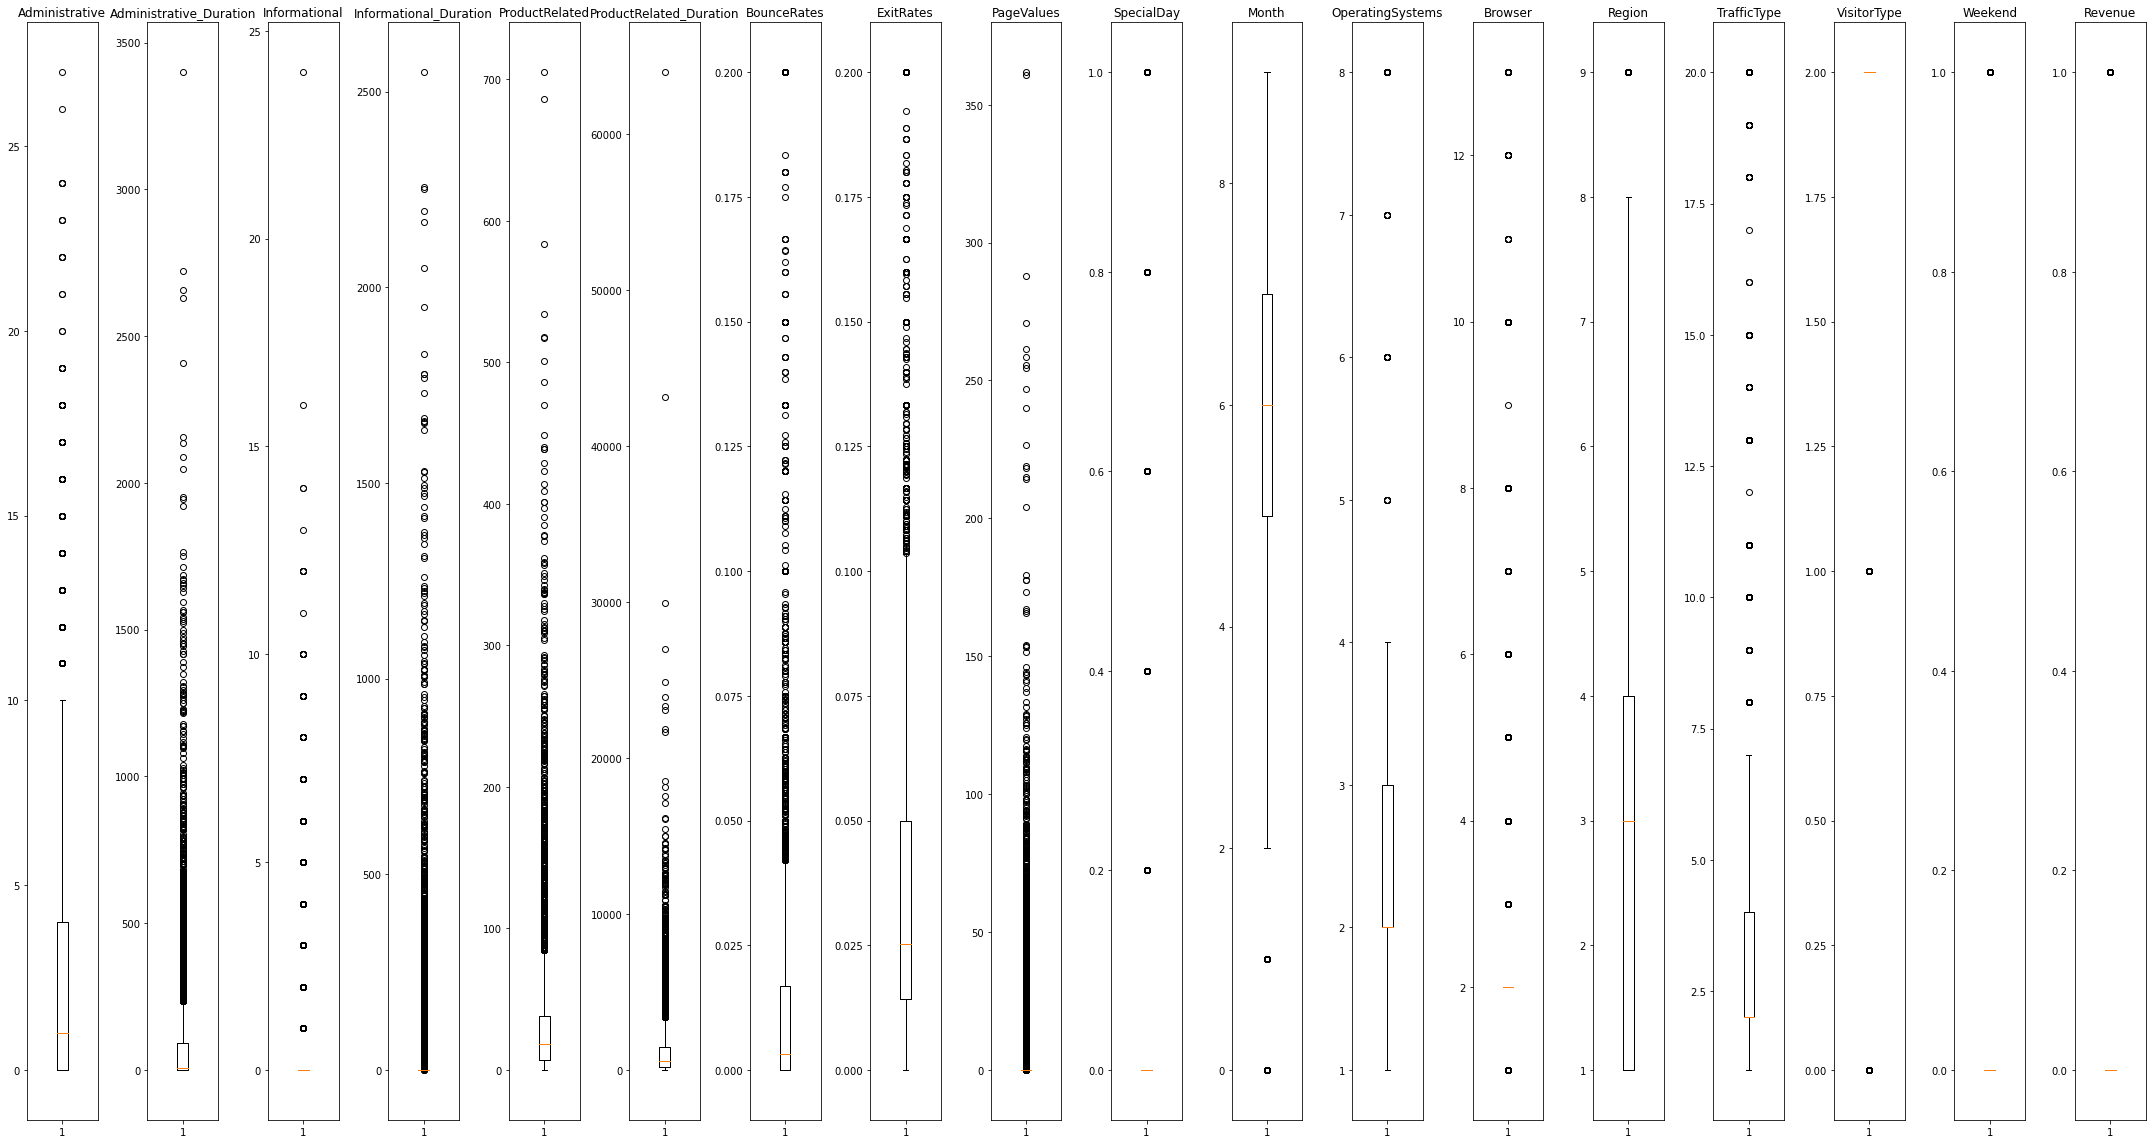

In [17]:
boxplots(dataset_name)

### 7.1.1. Interpretation of Boxplots

The boxplots for the categories and each of their durations call for more discussion. 

It is clear that the Administrative one had clearer boxplot probably due to being less frequently viewed. While the quartiles of Informational are fairly close which is why the boxplot is not visible. And ProductRelated has the shortest tail length of the three which may mean that the datapoints fall within the IQR of ProductRelated. While for the boxplots of each of their durations, it is evident that outliers exist. 

Bounce rates and exit rates boxplots are the most comparable: the exit rates median is situated higher than that of the bounce rate. Therefore, there are relatively more visitors who leave the session at the last page they view than those who enter and stay on the first session.

Overall, almost all discussed boxplots are positively skewed and have outliers beyond the upper whisker.

### 7.2. Boxplot Stats

In [18]:
def boxplot_stats(dataset_name):
    column_names = extract_numeric_cols(dataset_name)
    boxplot_stats_list = []
    for column_name in column_names:

        minimum = min(preprocess_data(dataset_name)[column_name])
        maximum = max(preprocess_data(dataset_name)[column_name])
        
        q1 = np.percentile(preprocess_data(dataset_name)[column_name], 25)
        q2 = np.percentile(preprocess_data(dataset_name)[column_name], 50)
        q3 = np.percentile(preprocess_data(dataset_name)[column_name], 75)

        iqr = q3 - q1

        whisker_low = q1 - 1.5 * iqr
        whisker_high = q3 + 1.5 * iqr

        boxplot_stats_list.append({
            'column_name': column_name,
            'whisker_low': whisker_low,
            'min': minimum,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'whisker_high': whisker_high,
            'max': maximum,
            'iqr': iqr
        })
        
    boxplot_stats_df = pd.DataFrame(boxplot_stats_list).set_index('column_name')
    return boxplot_stats_df.applymap('{:.2f}'.format)

In [19]:
boxplot_stats(dataset_name)

,whisker_low,min,q1,q2,q3,whisker_high,max,iqr
column_name,,,,,,,,
Administrative,-6.00,0.00,0.00,1.00,4.00,10.00,27.00,4.00
Administrative_Duration,-139.88,0.00,0.00,7.50,93.26,233.14,3398.75,93.26
Informational,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00
Informational_Duration,0.00,0.00,0.00,0.00,0.00,0.00,2549.38,0.00
ProductRelated,-39.50,0.00,7.00,18.00,38.00,84.50,705.00,31.00
ProductRelated_Duration,-1735.89,0.00,184.14,598.94,1464.16,3384.19,63973.52,1280.02
BounceRates,-0.03,0.00,0.00,0.00,0.02,0.04,0.20,0.02
ExitRates,-0.04,0.00,0.01,0.03,0.05,0.10,0.20,0.04
PageValues,0.00,0.00,0.00,0.00,0.00,0.00,361.76,0.00


It is clear that all the true numeric variables have datapoints that fall outside of the IQR which was identified from the boxplots as well.

### Class Variable Name

In [20]:
def class_var_name():
    class_variable = input('What is the name of the class column? ')
    return class_variable

In [24]:
class_variable = class_var_name()

What is the name of the class column? Revenue


## 8. Bar and Frequency plots

In [25]:
def cols_for_freq_plots():
    columns_list = input('Enter column names separated by commas: ').split(', ')
    return columns_list

In [26]:
cols_for_freq_plots = cols_for_freq_plots()

Enter column names separated by commas: Month, VisitorType, Weekend, Revenue


In [27]:
def frequency_plots(dataset_name, class_variable, cols_for_freq_plots):
    dataset = read_csv(dataset_name)
    num_plots = len(cols_for_freq_plots)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))

    if num_rows == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_for_freq_plots):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        
        ax = axes[row_idx][col_idx]

        sns.countplot(x=col, data=dataset, ax=ax)
        ax.set_title(f'Frequency Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
    plt.tight_layout()
    plt.show()

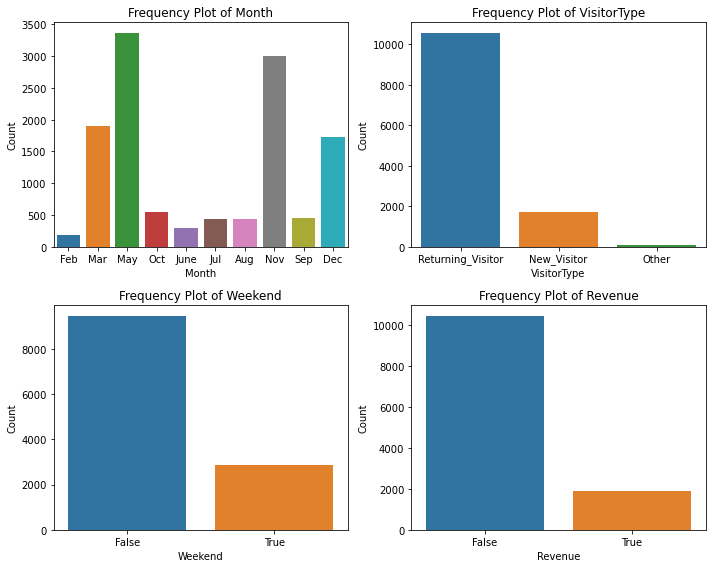

In [28]:
frequency_plots(dataset_name, class_variable, cols_for_freq_plots)

### 8.1. Interpretation of Frequency Plots

Other variables in the dataset which are inherently categorical include: Month, VisitorType, Weekend and Revenue. Specific interpretations are as follows, but goes without saying that most are imbalanced. 

1) In the Revenue plot, there were more than 5 times the shoppers who did not generate a revenue than those who did

2) More weekdays in the dataset

3) More returning type visitors

4) Highest number of sessions in May and Nov. 

In [29]:
def cat_cols():
    cat_cols = input('Enter column names separated by commas: ').split(', ')
    return cat_cols

In [31]:
categorical_cols = cat_cols()

Enter column names separated by commas: VisitorType, Weekend


In [32]:
def binary_categorical_barplots(dataset_name, class_variable, categorical_cols):
    dataset = pd.read_csv(dataset_name)
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    if num_plots % 2 != 0:
        num_cols = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
    
    if num_rows > 1:  
        for idx, col in enumerate(categorical_cols):
            row_idx = idx // num_cols
            col_idx = idx % num_cols

            ax = axes[row_idx][col_idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
    else:  
        for idx, col in enumerate(categorical_cols):
            ax = axes[idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
        
    plt.tight_layout()
    plt.show()

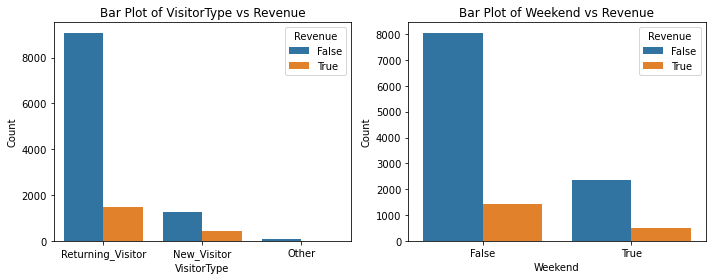

In [33]:
binary_categorical_barplots(dataset_name, class_variable, categorical_cols)

### 8.2. Interpretation of Categorical Bar Plots

1) In each of the types of visitors, there are more customers who do no generate a revenue

2) Whether it is a weekend or a weekday, there are more customers who don't generate a revenue or purchase. 

## 9. Correlation Analysis

In [34]:
def corr_heatmap(dataset_name, class_variable):
    corr_matrix = preprocess_data(dataset_name).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(10, 4))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    
    plt.title('Correlation Heatmap')
    plt.show()


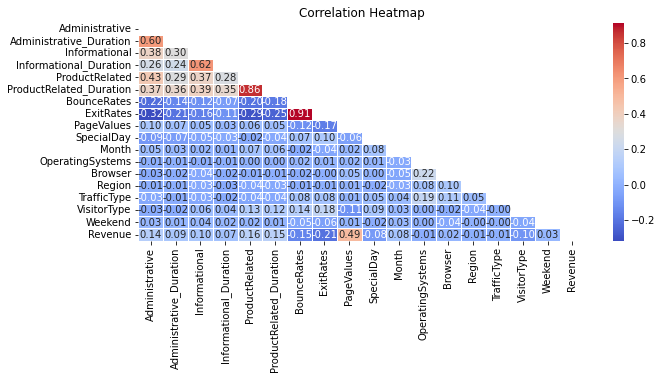

In [35]:
corr_heatmap(dataset_name, class_variable)

### 9.1. Interpretation of Correlation Heatmap

The observations from the correlation heatmap are as follows:

1) The strongest correlations are found between Bounce Rates and Exit Rates, and between Product Related and Product Related Duration. Both of these pairs of correlations are positive. The correlation between Product views and its duration is still understandable. However, the bounce and exit rates are essentially two distinct concepts and formulae, yet have a correlation. For e.g. a high exit rate does not guarantee a high bounce rate since viewers may have joined through some other page. 

2) Also surprisingly with the class variable, Revenue, more than half of the predictors variables have weak correlation except for the evident Page Values. 

## 10. Feature Selection 

Features have been selected through an approach using the correlations with the outcome variable. Those variables with absolute correlation between 0.2 and 1.0 with the outcome variable will be selected. Rest will be dropped. 

The idea is to choose variables with close to moderate to strong correlation with the class variable.

In [36]:
def feature_selection_by_corr(dataset_name, class_variable):
    corr_matrix = preprocess_data(dataset_name).corr()
    corr_with_target = corr_matrix[class_variable].drop(class_variable)

    ranked_features_df = pd.DataFrame({'Feature': corr_with_target.index, 'Correlation': corr_with_target.values})
    ranked_features_df.sort_values(by='Correlation', ascending=False, inplace=True)
    
    selected_features = ranked_features_df[(abs(ranked_features_df['Correlation']) >= 0.2) & (abs(ranked_features_df['Correlation']) <= 1.0)]['Feature'].tolist()
    
    return selected_features


In [37]:
feature_selection_by_corr(dataset_name, class_variable)

['PageValues', 'ExitRates']

In [38]:
def drop_unselected_features(dataset_name, class_variable):
    dataset = preprocess_data(dataset_name)
    
    selected_features = feature_selection_by_corr(dataset_name, class_variable)
    selected_dataset = dataset[selected_features + [class_variable]]

    return selected_dataset

In [39]:
drop_unselected_features(dataset_name, class_variable)

,PageValues,ExitRates,Revenue
0,0.000000,0.200000,0
1,0.000000,0.100000,0
2,0.000000,0.200000,0
3,0.000000,0.140000,0
4,0.000000,0.050000,0
...,...,...,...
12325,12.241717,0.029031,0
12326,0.000000,0.021333,0
12327,0.000000,0.086667,0
12328,0.000000,0.021053,0


In [40]:
def dimensions2(dataset_name, class_variable):
    dim = drop_unselected_features(dataset_name, class_variable).shape
    return dim

In [41]:
dimensions2(dataset_name, class_variable)

(12330, 3)

This processed and feature selected data is what will be used for model training and evaluating from this point onwards. The data now has 12330 rows and 3 columns (2 predictor variables and 1 outcome variable).

## 11. Data Splits with selected features only

In [42]:
def tvt_splits_fs(dataset_name, class_variable):
    y = drop_unselected_features(dataset_name, class_variable)[[class_variable]]
    X = drop_unselected_features(dataset_name, class_variable).drop(columns = [class_variable])
    # X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(read_csv(data), target = class_variable, train_size=0.6, valid_size=0.2, test_size=0.2, random_state = None) 
    
    total_size = len(preprocess_data(dataset_name))
    train_size = int(total_size * 0.6)
    valid_size = int(total_size * 0.2)

    # Split the data
    X_train, y_train = drop_unselected_features(dataset_name, class_variable).iloc[:train_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[:train_size, -1]
    X_valid, y_valid = drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, -1]
    X_test, y_test = drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, -1]
    
    y_train = pd.Series(y_train).to_frame(name=class_variable)
    y_valid = pd.Series(y_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [43]:
def splits_tabulated_fs(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)
    
    dataframes = [X_train, X_valid, X_test, y_train, y_valid, y_test]

    dataframe_names = ['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test']

    dataframe_shapes = {}
    for i, dataframe in enumerate(dataframes):
        dataframe_shapes[dataframe_names[i]] = dataframe.shape

    shape_train_test = pd.DataFrame.from_dict(dataframe_shapes, orient='index', columns=['Rows', 'Columns'])

    return shape_train_test

In [44]:
splits_tabulated_fs(dataset_name, class_variable)

,Rows,Columns
X_train,7398,2
X_valid,2466,2
X_test,2466,2
y_train,7398,1
y_valid,2466,1
y_test,2466,1


## 12. Applying and Evaluating model without CV

In [45]:
def model_without_CV(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)

    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    y_test = y_test.values.ravel()

    knn = KNeighborsClassifier(n_neighbors=5) 

    # Train
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)

    print('ROC for Train Set:')
    fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    print(classification_report(y_train, y_pred_train))
    
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'Train Precision: {precision_train:.4f}')
    print(f'Train Recall: {recall_train:.4f}')
    print(f'Train F1-score: {f1_train:.4f}')
    print(f'Train AUC: {auc_train:.4f}\n')

    # Valid
    y_pred_valid = knn.predict(X_valid)

    print('ROC for Validation Set:')
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Validation Set Metrics:')
    print(classification_report(y_valid, y_pred_valid))
    
    precision_valid = precision_score(y_valid, y_pred_valid)
    recall_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'Validation Precision: {precision_valid:.4f}')
    print(f'Validation Recall: {recall_valid:.4f}')
    print(f'Validation F1-score: {f1_valid:.4f}')
    print(f'Validation AUC: {auc_valid:.4f}\n')

    # Test
    y_pred_test = knn.predict(X_test)

    print('ROC for Test Set:')
    fpr_test, tpr_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Test Set Metrics:')
    print(classification_report(y_test, y_pred_test))
    
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1-score: {f1_test:.4f}')
    print(f'Test AUC: {auc_test:.4f}')

ROC for Train Set:


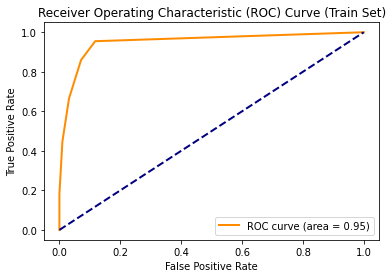

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6493
           1       0.75      0.67      0.70       905

    accuracy                           0.93      7398
   macro avg       0.85      0.82      0.83      7398
weighted avg       0.93      0.93      0.93      7398

Train Precision: 0.7460
Train Recall: 0.6652
Train F1-score: 0.7033
Train AUC: 0.9499

ROC for Validation Set:


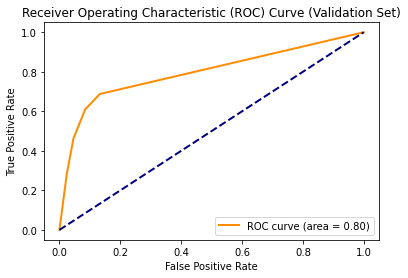

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1957
           1       0.72      0.46      0.56       509

    accuracy                           0.85      2466
   macro avg       0.80      0.71      0.74      2466
weighted avg       0.84      0.85      0.84      2466

Validation Precision: 0.7231
Validation Recall: 0.4617
Validation F1-score: 0.5635
Validation AUC: 0.7952

ROC for Test Set:


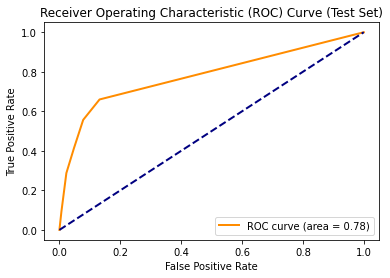

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1972
           1       0.68      0.41      0.52       494

    accuracy                           0.84      2466
   macro avg       0.78      0.68      0.71      2466
weighted avg       0.83      0.84      0.83      2466

Test Precision: 0.6846
Test Recall: 0.4130
Test F1-score: 0.5152
Test AUC: 0.7801


In [46]:
model_without_CV(dataset_name, class_variable)

## 13. Applying and Evaluating Model with CV

In [47]:
def model_with_CV(dataset_name, class_variable):
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(drop_unselected_features(dataset_name, class_variable).drop(columns=[class_variable]), drop_unselected_features(dataset_name, class_variable)[class_variable], test_size=0.2, random_state=42)
    y_train_valid = pd.Series(y_train_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    knn = KNeighborsClassifier(n_neighbors=5)
    k = 5

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    cv_scores = cross_val_score(knn, X_train_valid, y_train_valid.values.ravel(), cv=kf, scoring='accuracy')  # Example metric: accuracy
    best_score_index = cv_scores.argmax()
    best_knn = KNeighborsClassifier(n_neighbors=5) 
    best_knn.fit(X_train_valid, y_train_valid.values.ravel())

    y_pred_train = best_knn.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    train_report = classification_report(y_train.values.ravel(), y_pred_train)
    print(train_report)
    
    train_precision = precision_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_recall = recall_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train, average='weighted')
    print(f'Train Overall Precision: {train_precision:.4f}')
    print(f'Train Overall Recall: {train_recall:.4f}')
    print(f'Train Overall F1-score: {train_f1:.4f}\n')

    y_pred_valid = best_knn.predict(X_valid)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])

    plt.figure()
    plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Validation Set Metrics:')
    valid_report = classification_report(y_valid.values.ravel(), y_pred_valid)
    print(valid_report)

    valid_precision = precision_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_recall = recall_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_f1 = f1_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    print(f'Validation Overall Precision: {valid_precision:.4f}')
    print(f'Validation Overall Recall: {valid_recall:.4f}')
    print(f'Validation Overall F1-score: {valid_f1:.4f}\n')

    y_pred_test = best_knn.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Test Set Metrics:')
    test_report = classification_report(y_test.values.ravel(), y_pred_test)
    print(test_report)
    
    test_precision = precision_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_recall = recall_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_pred_test, average='weighted')
    print(f'Test Overall Precision: {test_precision:.4f}')
    print(f'Test Overall Recall: {test_recall:.4f}')
    print(f'Test Overall F1-score: {test_f1:.4f}')

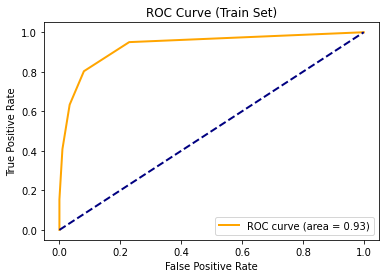

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6277
           1       0.77      0.63      0.70      1121

    accuracy                           0.92      7398
   macro avg       0.85      0.80      0.82      7398
weighted avg       0.91      0.92      0.91      7398

Train Overall Precision: 0.9114
Train Overall Recall: 0.9159
Train Overall F1-score: 0.9125



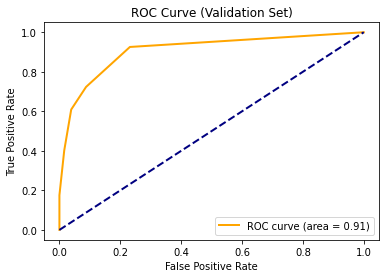

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2090
           1       0.74      0.61      0.67       376

    accuracy                           0.91      2466
   macro avg       0.84      0.79      0.81      2466
weighted avg       0.90      0.91      0.90      2466

Validation Overall Precision: 0.9024
Validation Overall Recall: 0.9075
Validation Overall F1-score: 0.9038



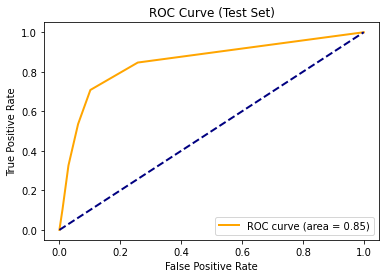

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2055
           1       0.64      0.54      0.58       411

    accuracy                           0.87      2466
   macro avg       0.77      0.74      0.75      2466
weighted avg       0.86      0.87      0.87      2466

Test Overall Precision: 0.8642
Test Overall Recall: 0.8715
Test Overall F1-score: 0.8669


In [48]:
model_with_CV(dataset_name, class_variable)

## 14. Summary of Model Results

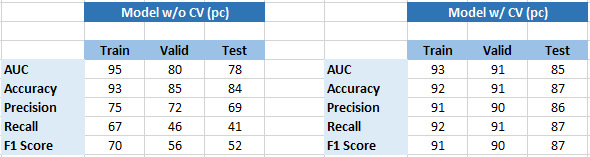

### 14.1. Interpretation with more focus on With CV Test Set metrics

First observation is that the model performs well in the training set and subsequently the performance deteriorates in the validation and test sets. 

Second, it is clear that cross validation has helped improve the model performance. AUC and accuracy are equal or higher in each of the sets in the with CV as compared to no CV, except for in the training set. 

Metrics of accuracy, recall, precision, f1-score and AUC will be explained through the with CV Test set numbers as follows:

1) **Accuracy:** The model correctly predicts shoppers who will and who don't intend to purchase or make a revenue for the co., 87% of the time. Although this is good accuracy, it may be misleading because of class variable is imbalanced. Majority shoppers do not purchase. 

2) **Recall:** The model predicts 87% of the purchase made correctly from the actual purchases.

3) **Precision:** The percentage of purchase predicted by the model that were actually purchases was 86. In other words, the model got the purchase predictions right 86% of the time of all the churn predictions. Again, the precision of 0 was higher than 1.

4) **F1-Score:** It is the harmonic mean of recall and precision and so means:

5) **AUC:** The probability that the model predicts a revenue/purchase instead of a non-purchase is 85%. 

Note: Of each of the 0,1 classes of the outcome variable, the higher percentage rested with the 0 class owing to the imbalance in the column.

## 15. Complied Master Function

In [49]:
def master_function():
    dataset_name = input('Name of the dataset: ')
    data = read_csv(dataset_name)
    print(dimensions(dataset_name))
    print(data_types(dataset_name))
    preprocess_data(dataset_name)
    print(missing_vals(dataset_name))
    print(descr(dataset_name))
    extract_numeric_cols(dataset_name)
    boxplots(dataset_name)
    print(boxplot_stats(dataset_name))
    class_variable = class_var_name()
    def cols_for_freq_plots():
        columns_list = input('Enter column names separated by commas: ').split(', ')
        return columns_list
    cols_for_freq_plots = cols_for_freq_plots()
    frequency_plots(dataset_name, class_variable, cols_for_freq_plots)
    def cat_cols():
        cat_cols = input('Enter column names separated by commas: ').split(', ')
        return cat_cols
    categorical_cols = cat_cols()
    binary_categorical_barplots(dataset_name, class_variable, categorical_cols)
    corr_heatmap(dataset_name, class_variable)
    feature_selection_by_corr(dataset_name, class_variable)
    drop_unselected_features(dataset_name, class_variable)
    dimensions2(dataset_name, class_variable)
    tvt_splits_fs(dataset_name, class_variable)
    print(splits_tabulated_fs(dataset_name, class_variable))
    model_without_CV(dataset_name, class_variable)
    model_with_CV(dataset_name, class_variable)

Name of the dataset: online_shoppers_intent.csv
(12330, 18)
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month 

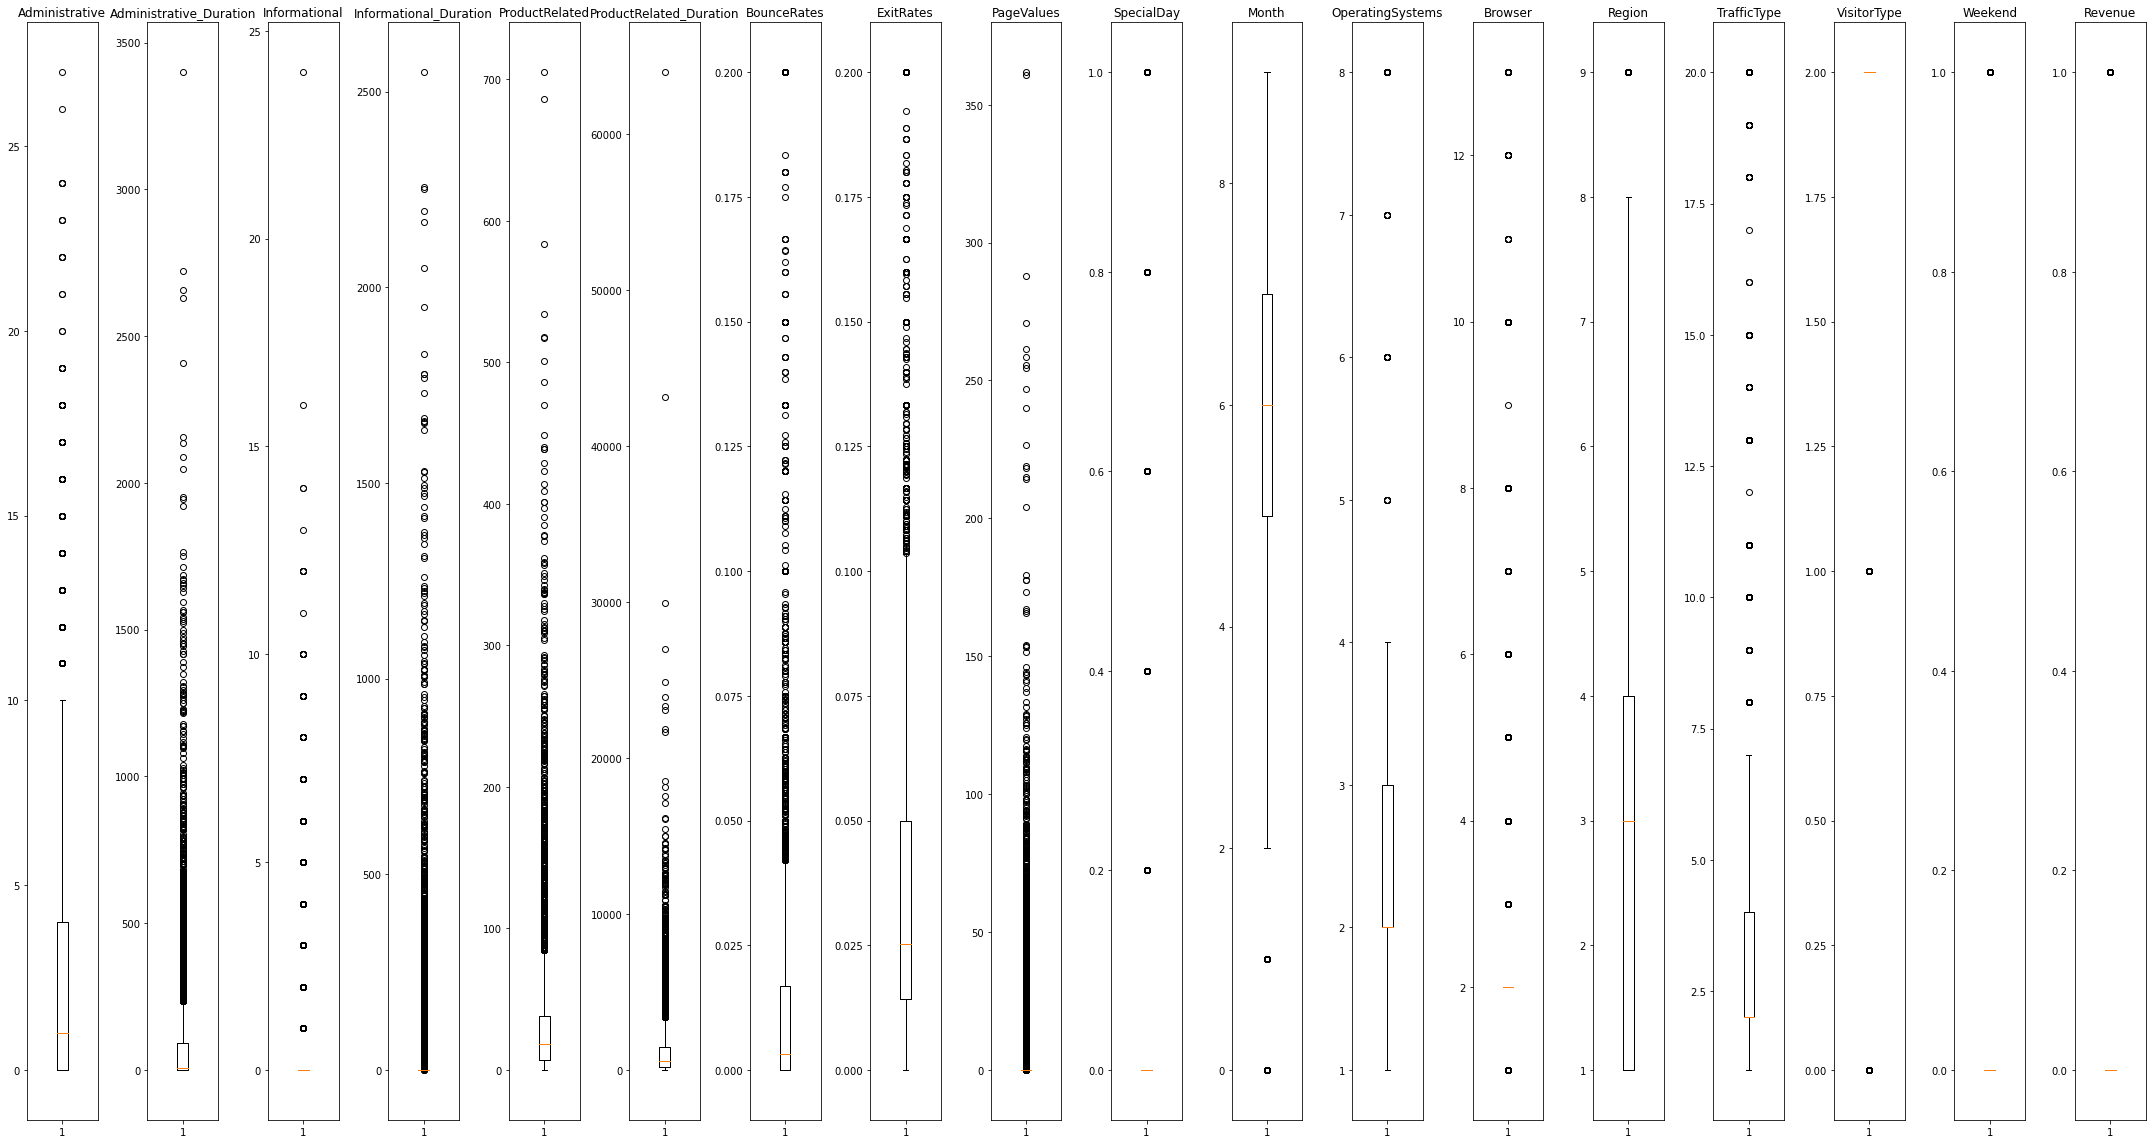

                        whisker_low   min      q1      q2       q3  \
column_name                                                          
Administrative                -6.00  0.00    0.00    1.00     4.00   
Administrative_Duration     -139.88  0.00    0.00    7.50    93.26   
Informational                  0.00  0.00    0.00    0.00     0.00   
Informational_Duration         0.00  0.00    0.00    0.00     0.00   
ProductRelated               -39.50  0.00    7.00   18.00    38.00   
ProductRelated_Duration    -1735.89  0.00  184.14  598.94  1464.16   
BounceRates                   -0.03  0.00    0.00    0.00     0.02   
ExitRates                     -0.04  0.00    0.01    0.03     0.05   
PageValues                     0.00  0.00    0.00    0.00     0.00   
SpecialDay                     0.00  0.00    0.00    0.00     0.00   
Month                          2.00  0.00    5.00    6.00     7.00   
OperatingSystems               0.50  1.00    2.00    2.00     3.00   
Browser             

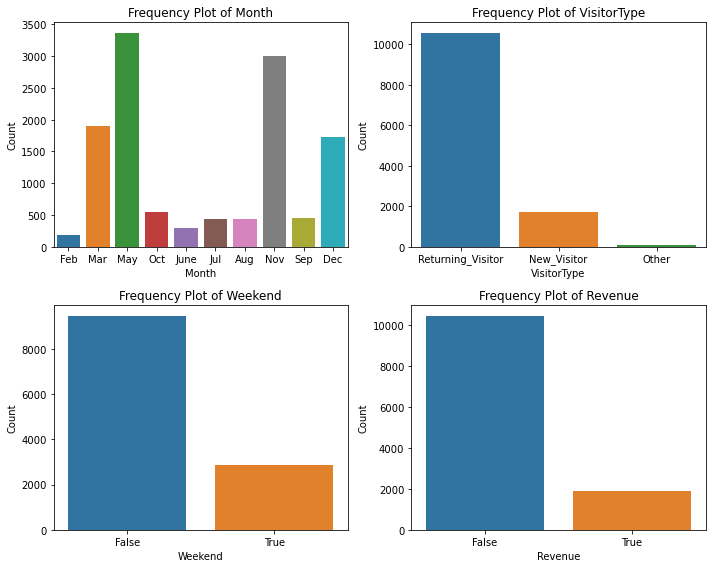

Enter column names separated by commas: VisitorType, Weekend


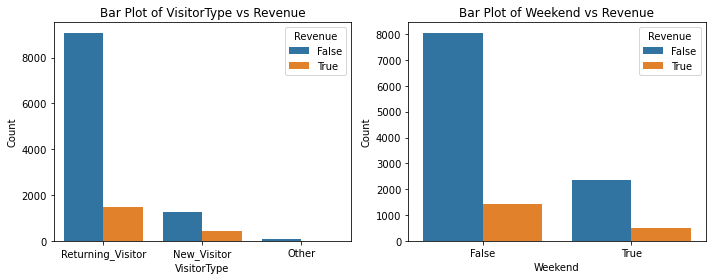

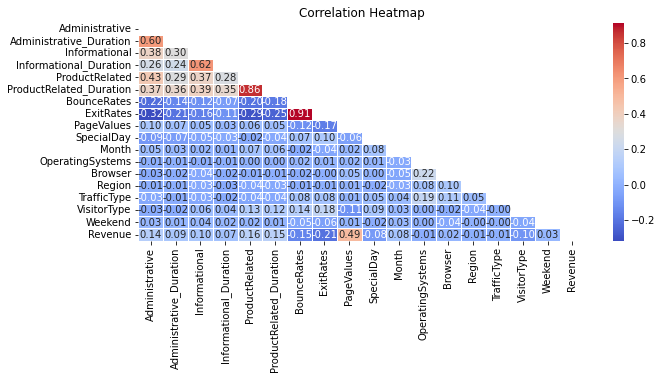

         Rows  Columns
X_train  7398        2
X_valid  2466        2
X_test   2466        2
y_train  7398        1
y_valid  2466        1
y_test   2466        1
ROC for Train Set:


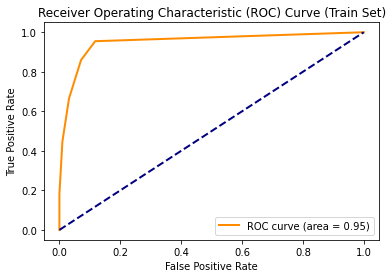

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6493
           1       0.75      0.67      0.70       905

    accuracy                           0.93      7398
   macro avg       0.85      0.82      0.83      7398
weighted avg       0.93      0.93      0.93      7398

Train Precision: 0.7460
Train Recall: 0.6652
Train F1-score: 0.7033
Train AUC: 0.9499

ROC for Validation Set:


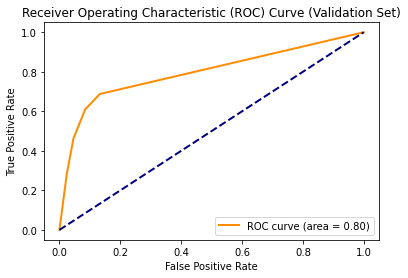

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1957
           1       0.72      0.46      0.56       509

    accuracy                           0.85      2466
   macro avg       0.80      0.71      0.74      2466
weighted avg       0.84      0.85      0.84      2466

Validation Precision: 0.7231
Validation Recall: 0.4617
Validation F1-score: 0.5635
Validation AUC: 0.7952

ROC for Test Set:


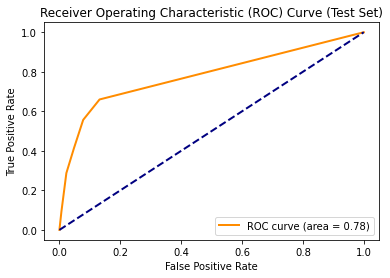

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1972
           1       0.68      0.41      0.52       494

    accuracy                           0.84      2466
   macro avg       0.78      0.68      0.71      2466
weighted avg       0.83      0.84      0.83      2466

Test Precision: 0.6846
Test Recall: 0.4130
Test F1-score: 0.5152
Test AUC: 0.7801


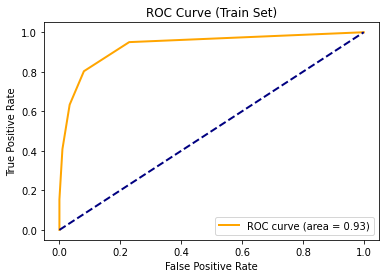

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6277
           1       0.77      0.63      0.70      1121

    accuracy                           0.92      7398
   macro avg       0.85      0.80      0.82      7398
weighted avg       0.91      0.92      0.91      7398

Train Overall Precision: 0.9114
Train Overall Recall: 0.9159
Train Overall F1-score: 0.9125



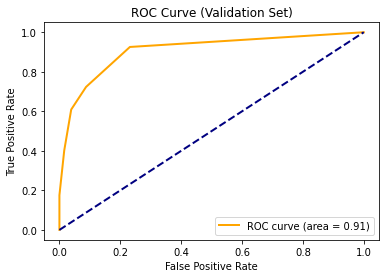

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2090
           1       0.74      0.61      0.67       376

    accuracy                           0.91      2466
   macro avg       0.84      0.79      0.81      2466
weighted avg       0.90      0.91      0.90      2466

Validation Overall Precision: 0.9024
Validation Overall Recall: 0.9075
Validation Overall F1-score: 0.9038



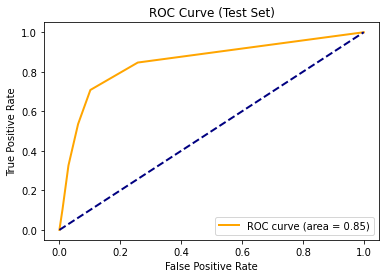

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2055
           1       0.64      0.54      0.58       411

    accuracy                           0.87      2466
   macro avg       0.77      0.74      0.75      2466
weighted avg       0.86      0.87      0.87      2466

Test Overall Precision: 0.8642
Test Overall Recall: 0.8715
Test Overall F1-score: 0.8669


In [50]:
master_function()